# ADVANCED DATA UNDERSTANDING

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dftrain=pd.read_csv("C:\\Users\\HP\\Downloads\\ravdess_dm2_2223\\ravdess_features_dm2\\RavdessAudioOnlyFeatures_TRAIN.csv")

In [3]:
dftrain

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,1,M,03-01-01-01-01-01-01.wav,158558,...,1.0,0.000000,0.566462,0.709962,0.799141,0.896606,1.0,1.0,6.742190,-1.706215
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,1,M,03-01-01-01-01-02-01.wav,160160,...,1.0,0.368623,0.472736,0.623183,0.744908,0.874713,1.0,1.0,-0.700420,-0.201495
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,1,M,03-01-01-01-02-01-01.wav,156956,...,1.0,0.000000,0.417919,0.643636,0.774253,0.899156,1.0,1.0,1.688986,-1.024773
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,1,M,03-01-01-01-02-02-01.wav,152152,...,1.0,0.306280,0.399641,0.606910,0.755213,0.886474,1.0,1.0,-0.594111,-0.412871
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,1,M,03-01-02-01-01-01-01.wav,169769,...,1.0,0.248765,0.428202,0.634815,0.759914,0.878014,1.0,1.0,0.126535,-0.620782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,audio-only,speech,surprised,normal,Dogs are sitting by the door,2nd,18,F,03-01-08-01-02-02-18.wav,168168,...,1.0,0.000000,0.000000,0.542632,0.728154,0.893268,1.0,1.0,0.262900,-1.051814
1824,audio-only,speech,surprised,strong,Kids are talking by the door,1st,18,F,03-01-08-02-01-01-18.wav,174575,...,1.0,0.000000,0.000000,0.375423,0.702983,0.900089,1.0,1.0,-0.857759,-0.608583
1825,audio-only,speech,surprised,strong,Kids are talking by the door,2nd,18,F,03-01-08-02-01-02-18.wav,169770,...,1.0,0.000000,0.097608,0.446789,0.686781,0.891486,1.0,1.0,-0.656632,-0.586954
1826,audio-only,speech,surprised,strong,Dogs are sitting by the door,1st,18,F,03-01-08-02-02-01-18.wav,185786,...,1.0,0.000000,0.000000,0.484284,0.712452,0.869563,1.0,1.0,-0.499022,-0.849045


In [4]:
dftest=pd.read_csv("C:\\Users\\HP\\Downloads\\ravdess_dm2_2223\\ravdess_features_dm2\\RavdessAudioOnlyFeatures_TEST.csv")

In [5]:
dftest

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,19,M,03-01-01-01-01-01-19.wav,161762,...,1.0,0.306697,0.466157,0.645931,0.789123,0.908316,1.0,1.0,-0.260279,-0.566556
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,19,M,03-01-01-01-01-02-19.wav,155355,...,1.0,0.170786,0.279347,0.557524,0.733053,0.866973,1.0,1.0,-0.428900,-0.587210
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,19,M,03-01-01-01-02-01-19.wav,160160,...,1.0,0.023285,0.305395,0.577750,0.741576,0.889984,1.0,1.0,0.626916,-0.883317
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,19,M,03-01-01-01-02-02-19.wav,158558,...,1.0,0.368081,0.434591,0.620144,0.776419,0.904668,1.0,1.0,-0.825144,-0.383701
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,19,M,03-01-02-01-01-01-19.wav,176176,...,1.0,0.298851,0.393112,0.623309,0.772964,0.907035,1.0,1.0,-0.536669,-0.547354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,audio-only,song,fearful,normal,Dogs are sitting by the door,2nd,24,F,03-02-06-01-02-02-24.wav,219419,...,1.0,0.003056,0.014688,0.482438,0.678422,0.834269,1.0,1.0,-0.495689,-0.746055
620,audio-only,song,fearful,strong,Kids are talking by the door,1st,24,F,03-02-06-02-01-01-24.wav,217817,...,1.0,0.003847,0.010327,0.336392,0.544155,0.754146,1.0,1.0,-0.877851,-0.152447
621,audio-only,song,fearful,strong,Kids are talking by the door,2nd,24,F,03-02-06-02-01-02-24.wav,206606,...,1.0,0.004732,0.016150,0.279892,0.516853,0.729066,1.0,1.0,-0.997740,-0.003013
622,audio-only,song,fearful,strong,Dogs are sitting by the door,1st,24,F,03-02-06-02-02-01-24.wav,203404,...,1.0,0.019884,0.066764,0.408438,0.615354,0.798053,1.0,1.0,-0.670500,-0.325276


In [6]:
dftest

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename,frame_count,...,stft_max_w4,stft_q01_w4,stft_q05_w4,stft_q25_w4,stft_q50_w4,stft_q75_w4,stft_q95_w4,stft_q99_w4,stft_kur_w4,stft_skew_w4
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,19,M,03-01-01-01-01-01-19.wav,161762,...,1.0,0.306697,0.466157,0.645931,0.789123,0.908316,1.0,1.0,-0.260279,-0.566556
1,audio-only,speech,neutral,normal,Kids are talking by the door,2nd,19,M,03-01-01-01-01-02-19.wav,155355,...,1.0,0.170786,0.279347,0.557524,0.733053,0.866973,1.0,1.0,-0.428900,-0.587210
2,audio-only,speech,neutral,normal,Dogs are sitting by the door,1st,19,M,03-01-01-01-02-01-19.wav,160160,...,1.0,0.023285,0.305395,0.577750,0.741576,0.889984,1.0,1.0,0.626916,-0.883317
3,audio-only,speech,neutral,normal,Dogs are sitting by the door,2nd,19,M,03-01-01-01-02-02-19.wav,158558,...,1.0,0.368081,0.434591,0.620144,0.776419,0.904668,1.0,1.0,-0.825144,-0.383701
4,audio-only,speech,calm,normal,Kids are talking by the door,1st,19,M,03-01-02-01-01-01-19.wav,176176,...,1.0,0.298851,0.393112,0.623309,0.772964,0.907035,1.0,1.0,-0.536669,-0.547354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,audio-only,song,fearful,normal,Dogs are sitting by the door,2nd,24,F,03-02-06-01-02-02-24.wav,219419,...,1.0,0.003056,0.014688,0.482438,0.678422,0.834269,1.0,1.0,-0.495689,-0.746055
620,audio-only,song,fearful,strong,Kids are talking by the door,1st,24,F,03-02-06-02-01-01-24.wav,217817,...,1.0,0.003847,0.010327,0.336392,0.544155,0.754146,1.0,1.0,-0.877851,-0.152447
621,audio-only,song,fearful,strong,Kids are talking by the door,2nd,24,F,03-02-06-02-01-02-24.wav,206606,...,1.0,0.004732,0.016150,0.279892,0.516853,0.729066,1.0,1.0,-0.997740,-0.003013
622,audio-only,song,fearful,strong,Dogs are sitting by the door,1st,24,F,03-02-06-02-02-01-24.wav,203404,...,1.0,0.019884,0.066764,0.408438,0.615354,0.798053,1.0,1.0,-0.670500,-0.325276


In [7]:
dftrain.isnull().sum().sum()

0

In [8]:
dftest.isnull().sum().sum()

0

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(dftrain.iloc[:,9:], dftrain.iloc[:,1])

y_pred = clf.predict(dftest.iloc[:,9:])

print('Accuracy %s' % accuracy_score(dftest.iloc[:,1], y_pred))
print('F1-score %s' % f1_score(dftest.iloc[:,1], y_pred, average=None))
print(classification_report(dftest.iloc[:,1], y_pred, digits=3))

Accuracy 0.9086538461538461
F1-score [0.89502762 0.91914894]
              precision    recall  f1-score   support

        song      0.871     0.920     0.895       264
      speech      0.939     0.900     0.919       360

    accuracy                          0.909       624
   macro avg      0.905     0.910     0.907       624
weighted avg      0.910     0.909     0.909       624



In [10]:
#standardizzazione variabili
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

dftrain.iloc[:,9:]=pd.DataFrame(scaler.fit_transform(dftrain.iloc[:,9:]))

dftest.iloc[:,9:]=pd.DataFrame(scaler.fit_transform(dftest.iloc[:,9:]))

y_train=dftrain.iloc[:,1]
y_test=dftest.iloc[:,1]
X_train=dftrain.iloc[:,9:]
X_test=dftest.iloc[:,9:]

In [11]:
dftrain.shape

(1828, 434)

# DIMENSIONALITY REDUCTION

In [12]:
print(X_train.shape)

(1828, 425)


In [15]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report


sel = RFE(DecisionTreeClassifier(), n_features_to_select=9)
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

X_test_sel = sel.transform(X_test)

selected_indices = sel.get_support(indices=True)
selected_feature_names = X_train.columns[selected_indices]

X_train_sel = pd.DataFrame(X_train_sel, columns=selected_feature_names)
X_test_sel = pd.DataFrame(X_test_sel, columns=selected_feature_names)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))
print('---')

Accuracy: 0.9262820512820513
F1-score: [0.91254753 0.93628809]
              precision    recall  f1-score   support

        song      0.916     0.909     0.913       264
      speech      0.934     0.939     0.936       360

    accuracy                          0.926       624
   macro avg      0.925     0.924     0.924       624
weighted avg      0.926     0.926     0.926       624

---


In [16]:
X_train=X_train_sel
X_test=X_test_sel

In [18]:
X_train

,q25,kur,sc_q25,sc_q75_w2,sc_skew_w2,length_w4,skew_w4,mfcc_kur_w4,stft_q05_w4
0,0.603864,0.553248,0.387032,0.649332,-0.561696,-1.265421,0.513083,-0.256236,2.167997
1,0.603864,0.770118,0.398216,0.689120,-0.926601,-1.209226,-0.188229,0.125946,1.610931
2,0.622665,0.851346,-0.312653,1.200776,-0.760880,-1.321756,-0.654564,-0.106623,1.285119
3,0.603864,1.562804,0.206846,1.544018,-0.950410,-1.490480,-0.001150,-0.407086,1.176485
4,0.603864,0.286970,-0.046467,0.553519,-0.372184,-0.871637,0.248884,0.028587,1.346235
...,...,...,...,...,...,...,...,...,...
1823,0.622665,-0.713004,1.211045,1.837517,-1.150106,-0.927972,0.945872,0.626044,-1.198817
1824,0.603864,-0.237333,3.484695,0.644416,-0.183011,-0.702913,0.222664,1.031695,-1.198817
1825,0.622665,-0.806583,2.840325,0.778131,-0.283868,-0.871637,0.462088,0.949815,-0.618677
1826,0.603864,-1.013416,1.858691,1.933534,-0.991040,-0.309130,1.597068,1.295573,-1.198817


# OUTLIER DETECTION

In [ ]:
#Identify the top 1% outliers: adopt at least three different methods from different families 
#(e.g., density-based, angle-based…) and compare the results

In [19]:
from collections import Counter
from collections import defaultdict

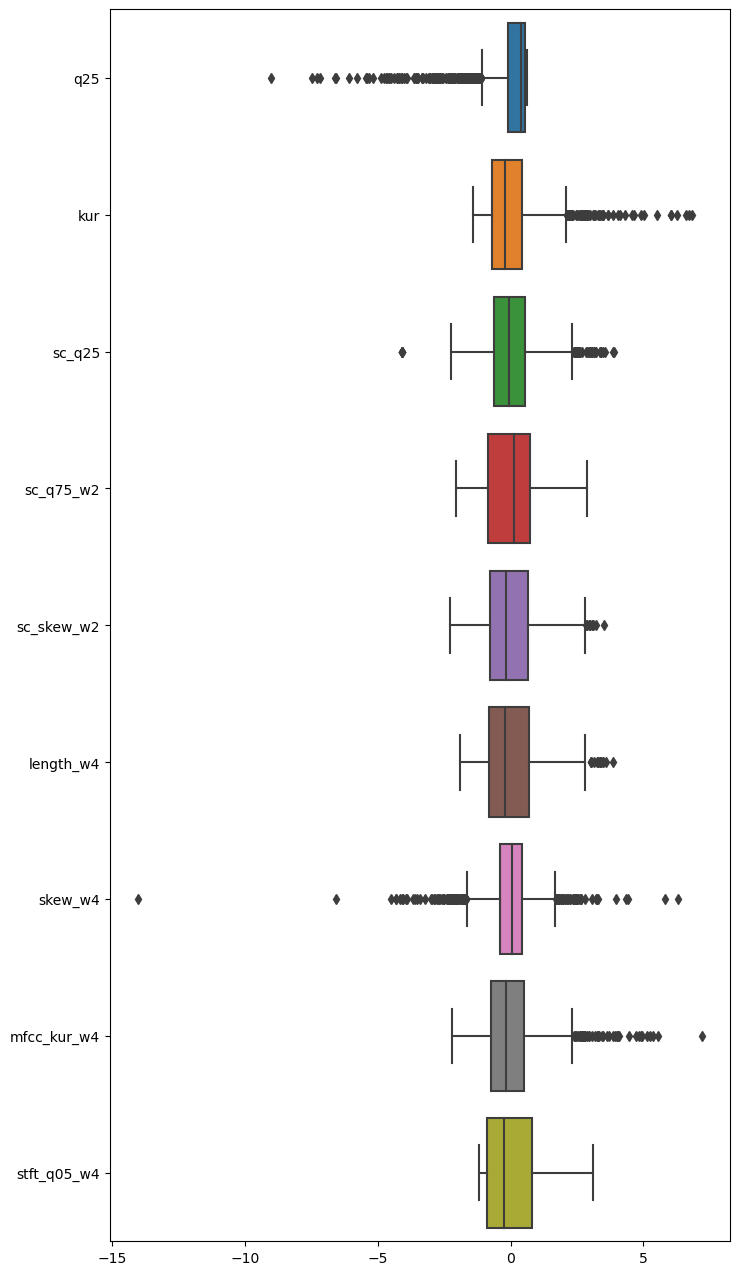

In [20]:
#visual approach
#boxplot

plt.figure(figsize = (8,16))
sns.boxplot(data = X_train, orient = "h")
plt.show()

In [21]:
np.unique(y_pred, return_counts=True)

(array(['song', 'speech'], dtype=object), array([262, 362], dtype=int64))

In [75]:
#density based approach
#local outlier function

from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=5)
outliers = clf.fit_predict(X_train)
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  35, 1793], dtype=int64))

In [76]:
outliers.shape

(1828,)

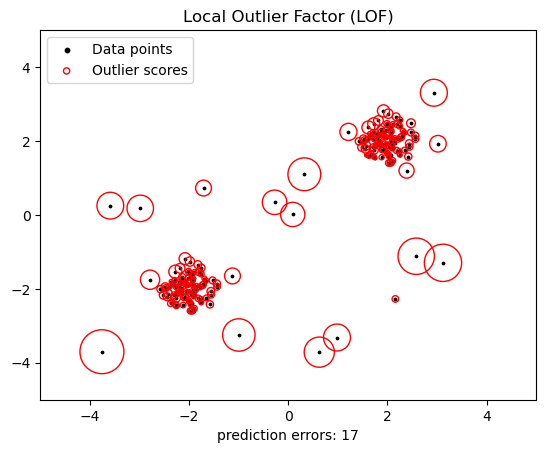

In [79]:
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=5, contamination=0.01)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(Xa[:, 0], Xa[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xa[:, 0], Xa[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [81]:
!pip install pyod

     ---------------------------------------- 14.0/14.0 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


ERROR: Could not install packages due to an OSError: [WinError 5] Accesso negato: 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [82]:
from pyod.models.lof import LOF

clf = LOF(n_neighbors=5)
clf.fit(X_train)

outliers = clf.predict(X_train)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([1724,  104], dtype=int64))

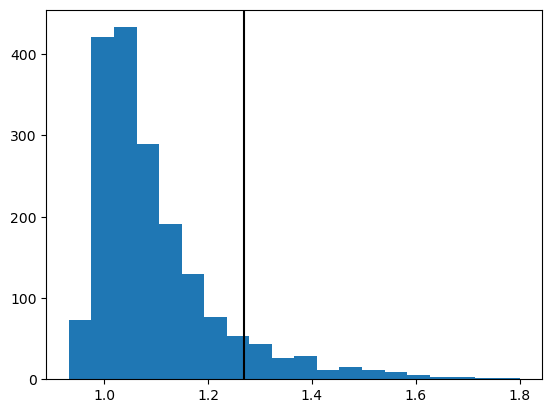

In [83]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [87]:
#Model Based Approach
#Random Forest
from sklearn.ensemble import IsolationForest

clf = IsolationForest()
clf.fit(X_train)

outliers = clf.predict(X_test)

np.unique(outliers, return_counts=True)

(array([-1,  1]), array([150, 474], dtype=int64))

In [88]:
from pyod.models.iforest import IsolationForest

clf = IsolationForest()
clf.fit(X_train)

outliers = clf.predict(X_train)
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 231, 1597], dtype=int64))

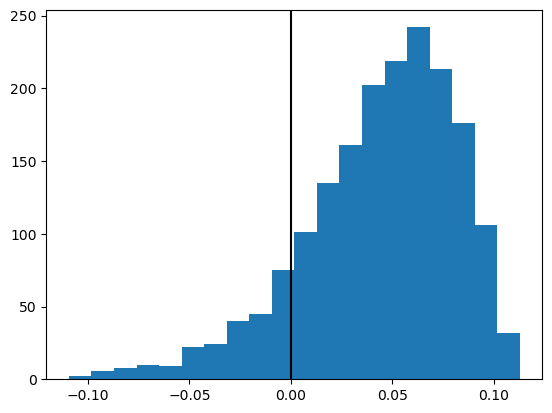

In [89]:
plt.hist(clf.decision_function(X_train), bins=20)
plt.axvline(np.min(clf.decision_function(X_train)[np.where(outliers==1)]), c='k')
plt.show()

In [27]:
#Visualize the outliers in a 2 or 3d scatter plot using at least one dimensionality reduction technique

In [99]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(X_train)
X_pca = pca.transform(X_train)

X_pca=pd.DataFrame(X_pca)

In [102]:
import matplotlib.pyplot as plt

def estimate_gaussian(X):

    mu = np.mean(X) # moyenne cf mu
    sigma = np.std(X) # écart_type/standard deviation
    limit = sigma * 1.96

    min_threshold = mu - limit
    max_threshold = mu + limit

    return mu, sigma, min_threshold, max_threshold

mu, sigma, min_threshold, max_threshold = estimate_gaussian(X_pca.values)

condition1 = (X_pca < min_threshold)
condition2 = (X_pca > max_threshold)

outliers1 = np.extract(condition1, X_pca)
outliers2 = np.extract(condition2, X_pca)

outliers = np.concatenate((outliers1, outliers2), axis=0)


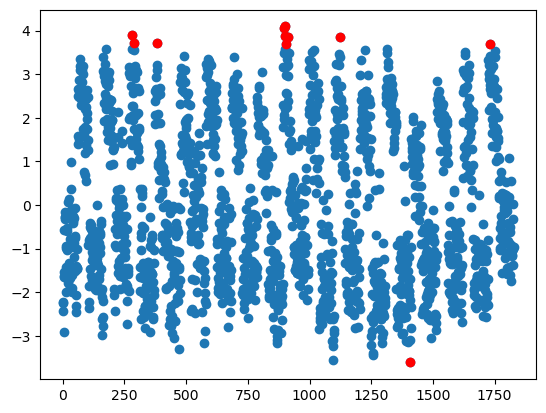

In [103]:
X_red = X_pca[X_pca.values==outliers]

plt.scatter(X_pca.index,X_pca.values)
plt.scatter(X_red.index,X_red.values,c='red')
plt.show()


In [31]:
#Deal with the outliers in a way you see fit, e.g. by removing them from the dataset or by treating the anomalous variables 
#as missing values and employing replacement techniques. In this second case, you should check that the outliers 
#are not outliers anymore. Justify your choices in every step.


In [32]:
X_train.describe()

,q25,kur,sc_q25,sc_q75_w2,sc_skew_w2,length_w4,skew_w4,mfcc_kur_w4,stft_q05_w4
count,1.828000e+03,1.828000e+03,1.828000e+03,1.828000e+03,1.828000e+03,1.828000e+03,1.828000e+03,1.828000e+03,1.828000e+03
mean,4.700835e-17,2.446378e-16,-1.921633e-16,-2.508327e-16,6.747581e-17,4.099565e-16,6.702030e-17,-3.471694e-15,1.364092e-16
std,1.000274e+00,1.000274e+00,1.000274e+00,1.000274e+00,1.000274e+00,1.000274e+00,1.000274e+00,1.000274e+00,1.000274e+00
min,-9.003450e+00,-1.418137e+00,-4.074237e+00,-2.066580e+00,-2.273076e+00,-1.884123e+00,-1.401038e+01,-2.220800e+00,-1.198817e+00
25%,-1.105742e-01,-6.948363e-01,-6.414319e-01,-8.678851e-01,-7.691010e-01,-8.154428e-01,-3.991232e-01,-7.474322e-01,-8.943748e-01
50%,3.782520e-01,-2.201275e-01,-7.392811e-02,1.168380e-01,-1.820211e-01,-1.966003e-01,7.077809e-02,-1.747851e-01,-2.374551e-01
75%,5.474610e-01,4.195226e-01,5.502168e-01,7.337576e-01,6.635864e-01,7.033554e-01,4.360025e-01,5.011541e-01,7.979613e-01
max,6.226650e-01,6.834611e+00,3.886727e+00,2.876770e+00,3.524855e+00,3.853341e+00,6.308896e+00,7.193158e+00,3.118676e+00


In [33]:
from scipy.stats import shapiro 

for i in range(len(X_train.columns)):
    xarray=X_train.to_numpy()[i]
    print(i, shapiro(xarray))
    
#variabili che non provengono da una normale 17, 18

0 ShapiroResult(statistic=0.9232572317123413, pvalue=0.41988804936408997)
1 ShapiroResult(statistic=0.9570536613464355, pvalue=0.7670351266860962)
2 ShapiroResult(statistic=0.9351284503936768, pvalue=0.5316535234451294)
3 ShapiroResult(statistic=0.948405385017395, pvalue=0.6725637912750244)
4 ShapiroResult(statistic=0.9809510707855225, pvalue=0.968987762928009)
5 ShapiroResult(statistic=0.9732610583305359, pvalue=0.9210900068283081)
6 ShapiroResult(statistic=0.9144794940948486, pvalue=0.3484977185726166)
7 ShapiroResult(statistic=0.9538471102714539, pvalue=0.7322540879249573)
8 ShapiroResult(statistic=0.9081706404685974, pvalue=0.3032805621623993)


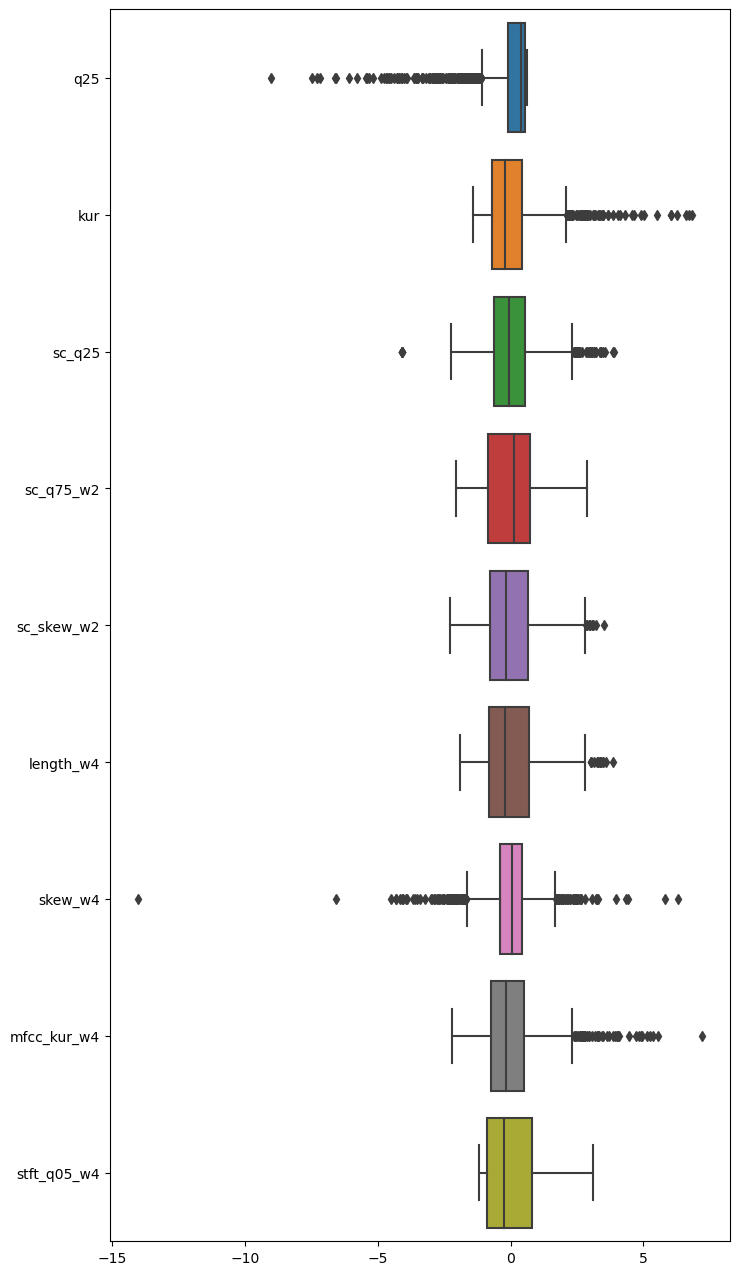

In [34]:
#boxplot prima di aver sostituito outliers

plt.figure(figsize = (8,16))
sns.boxplot(data = X_train, orient = "h")
plt.show()

In [35]:
def replace_outlier(val, mean, std):
    if val > mean + 2.57*std:
        return mean 
    elif val < mean - 2.57*std:
        return mean
    return val

for col in X_train.iloc[:,0:len(X_train)]:
    mean = X_train[col].mean()
    std_dev = X_train[col].std(axis=0)
    X_train[col] = X_train[col].map(lambda x: replace_outlier(x, mean, std_dev))



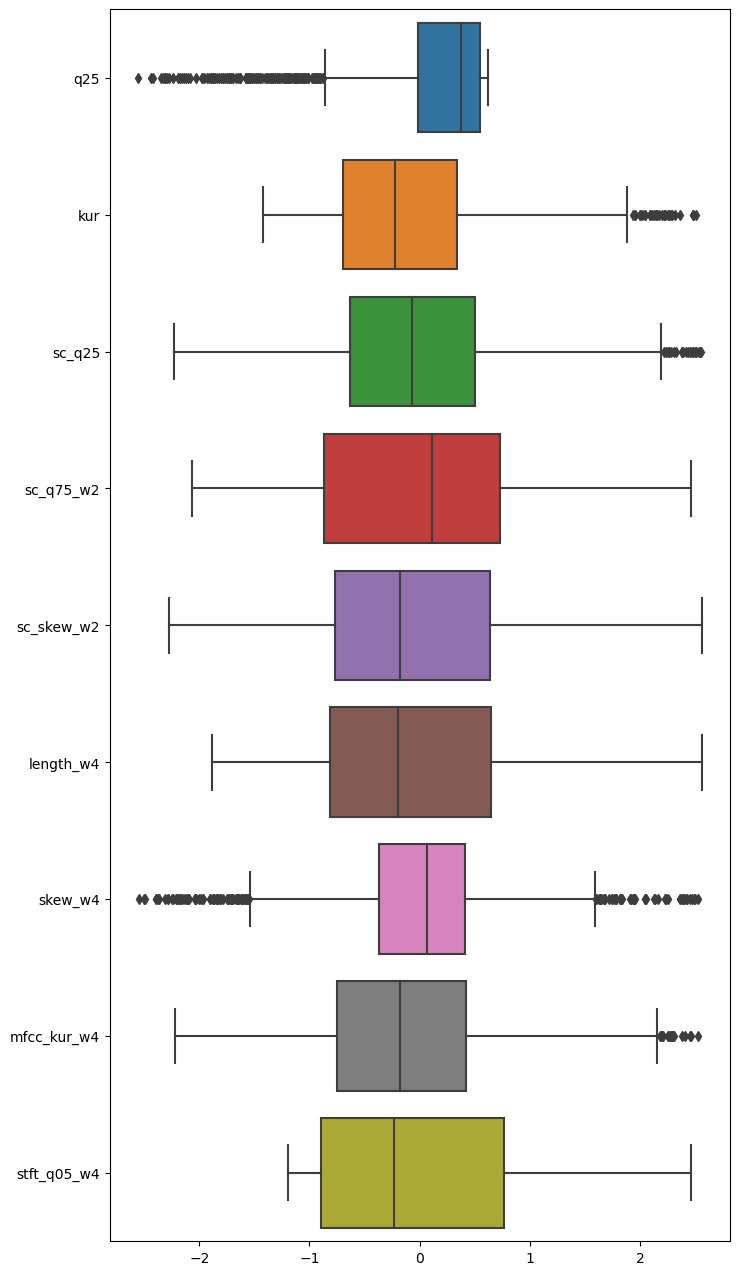

In [36]:
#boxplot dopo aver sostituito outliers

plt.figure(figsize = (8,16))
sns.boxplot(data = X_train, orient = "h")
plt.show()

In [38]:
y_train=pd.DataFrame(dftrain.iloc[:,1])
y_test=pd.DataFrame(dftest.iloc[:,1])

In [39]:
X_train

,q25,kur,sc_q25,sc_q75_w2,sc_skew_w2,length_w4,skew_w4,mfcc_kur_w4,stft_q05_w4
0,0.603864,0.553248,3.870318e-01,0.649332,-0.561696,-1.265421,0.513083,-0.256236,2.167997
1,0.603864,0.770118,3.982157e-01,0.689120,-0.926601,-1.209226,-0.188229,0.125946,1.610931
2,0.622665,0.851346,-3.126531e-01,1.200776,-0.760880,-1.321756,-0.654564,-0.106623,1.285119
3,0.603864,1.562804,2.068458e-01,1.544018,-0.950410,-1.490480,-0.001150,-0.407086,1.176485
4,0.603864,0.286970,-4.646748e-02,0.553519,-0.372184,-0.871637,0.248884,0.028587,1.346235
...,...,...,...,...,...,...,...,...,...
1823,0.622665,-0.713004,1.211045e+00,1.837517,-1.150106,-0.927972,0.945872,0.626044,-1.198817
1824,0.603864,-0.237333,-1.921633e-16,0.644416,-0.183011,-0.702913,0.222664,1.031695,-1.198817
1825,0.622665,-0.806583,-1.921633e-16,0.778131,-0.283868,-0.871637,0.462088,0.949815,-0.618677
1826,0.603864,-1.013416,1.858691e+00,1.933534,-0.991040,-0.309130,1.597068,1.295573,-1.198817


# IMBALANCE LEARNING

In [40]:
#- Define one simple unbalanced classification tasks and solve it with Decision Tree or KNN.

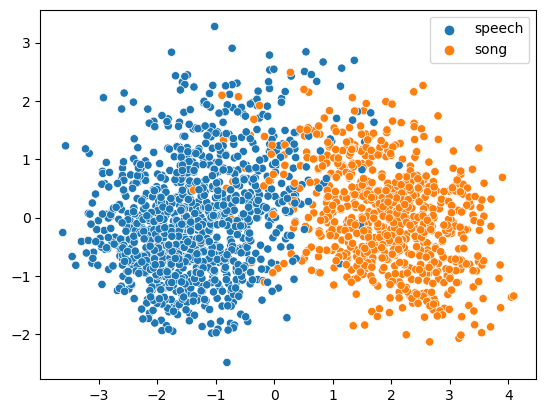

In [175]:
#original Scatter Plot
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=np.array(y_train)[:,0]);
plt.show()

In [42]:
np.unique(y_train, return_counts=True)

(array(['song', 'speech'], dtype=object), array([ 748, 1080], dtype=int64))

In [43]:
np.unique(y_test, return_counts=True)

(array(['song', 'speech'], dtype=object), array([264, 360], dtype=int64))

In [143]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train, y_train)

y_test_pred = dt.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        song       0.92      0.94      0.93       264
      speech       0.95      0.94      0.95       360

    accuracy                           0.94       624
   macro avg       0.94      0.94      0.94       624
weighted avg       0.94      0.94      0.94       624



In [144]:
for i in range(7):
    print(dftrain.iloc[:,i].value_counts())

audio-only    1828
Name: modality, dtype: int64
speech    1080
song       748
Name: vocal_channel, dtype: int64
calm         280
happy        280
sad          280
angry        280
fearful      280
disgust      144
surprised    144
neutral      140
Name: emotion, dtype: int64
normal    984
strong    844
Name: emotional_intensity, dtype: int64
Kids are talking by the door    914
Dogs are sitting by the door    914
Name: statement, dtype: int64
1st    914
2nd    914
Name: repetition, dtype: int64
1     104
2     104
17    104
16    104
15    104
14    104
13    104
12    104
11    104
10    104
9     104
8     104
7     104
6     104
5     104
4     104
3     104
18     60
Name: actor, dtype: int64


In [145]:
#If the dataset is already unbalanced leave it as it is, otherwise turns the dataset into an imbalanced version 
#(e.g., 96% - 4%, for binary classification).


In [146]:
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()

y_train_dummy = pd.DataFrame(label_encoder.fit_transform(y_train))
y_train_dummy.columns = ['vocal_channel']
y_train_dummy

,vocal_channel
0,1
1,1
2,1
3,1
4,1
...,...
1823,1
1824,1
1825,1
1826,1


In [147]:
y_train

,vocal_channel
0,speech
1,speech
2,speech
3,speech
4,speech
...,...
1823,speech
1824,speech
1825,speech
1826,speech


In [148]:
y_train_dummy.value_counts()
#1=speech; 0=song

vocal_channel
1                1080
0                 748
dtype: int64

In [177]:
a=[]
for i in range(len(y_train_dummy)):
    if y_train_dummy.iloc[i,0]==1:
        a.append(y_train.index[i])
        
speech_index=np.array(a)

In [178]:
rows2remove = np.random.choice(speech_index, 1080 - 30, replace=False)

In [179]:
len(y_train)

1828

In [180]:
y_train2 = y_train.drop(index=rows2remove, axis=0)


Xtrain2=X_train.drop(index=rows2remove, axis=0)

print(len(y_train2))

778


In [181]:
Xtrain2.shape

(778, 9)

In [182]:
y_train2.value_counts()

vocal_channel
song             748
speech            30
dtype: int64

In [183]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Xtrain2)
X_pca = pca.transform(Xtrain2)

In [184]:
pd.DataFrame(X_pca).describe()

,0,1
count,7.780000e+02,7.780000e+02
mean,-1.820880e-16,-1.553670e-16
std,1.172991e+00,9.166742e-01
min,-2.527152e+00,-2.755951e+00
25%,-8.716268e-01,-6.009816e-01
50%,-1.227112e-01,-4.923232e-04
75%,6.877861e-01,5.625255e-01
max,3.780524e+00,2.802261e+00


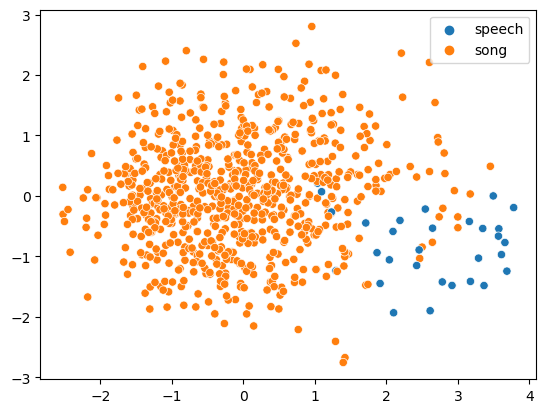

In [185]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=np.array(y_train2)[:,0]);
plt.show()

In [158]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)

dt.fit(Xtrain2, y_train2)

y_test_pred = dt.predict(X_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

        song       0.81      0.98      0.88       264
      speech       0.98      0.83      0.90       360

    accuracy                           0.89       624
   macro avg       0.89      0.90      0.89       624
weighted avg       0.91      0.89      0.89       624



In [159]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [160]:
#Then solve the classification task using the Decision Tree or KNN by adopting at least 2 techniques of 
#imbalanced learning (Undersampling, Oversampling)

In [161]:
#Undersampling
#Random UnderSampling
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.simplefilter("ignore")

In [162]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_pca, y_train2)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'vocal_channel': 1})


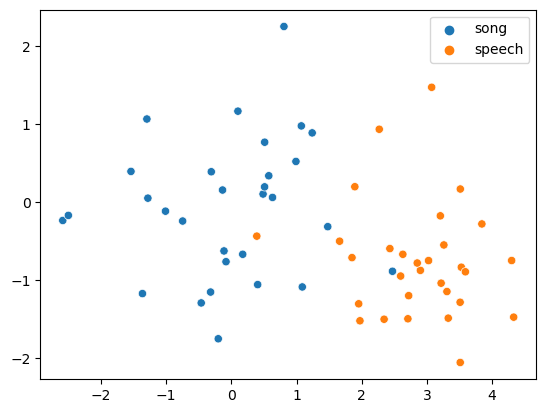

In [163]:
sns.scatterplot(x=X_res[:,0], y=X_res[:,1], hue=np.array(y_res)[:,0]);
plt.show()

Accuracy 0.8920454545454546
F1-score [0.89579525 0.88801572]
              precision    recall  f1-score   support

        song       0.87      0.93      0.90       264
      speech       0.92      0.86      0.89       264

    accuracy                           0.89       528
   macro avg       0.89      0.89      0.89       528
weighted avg       0.89      0.89      0.89       528



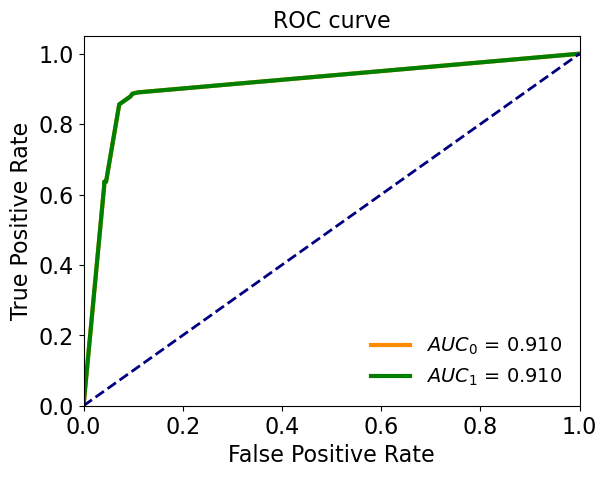

In [186]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)
X_test_res, y_test_res = RandomUnderSampler().fit_resample(X_test, y_test)

# Applica la PCA all'X_test utilizzando gli stessi PCs dell'X_train
X_test_pca = pca.transform(X_test_res)

# Ora puoi utilizzare X_test_pca come input per il tuo modello addestrato
y_pred = clf.predict(X_test_pca)

# Calcola le metriche di valutazione del modello
print('Accuracy %s' % accuracy_score(y_test_res, y_pred))
print('F1-score %s' % f1_score(y_test_res, y_pred, average=None))
print(classification_report(y_test_res, y_pred))


label_encoder = LabelEncoder()
y_t = pd.DataFrame(label_encoder.fit_transform(y_test_res))

y_score = clf.predict_proba(X_test_pca)
fpr, tpr, _ = roc_curve(y_t, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [165]:
#Undersampling
#Condensed Nearest Neighbor
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_pca, y_train2)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'vocal_channel': 1})


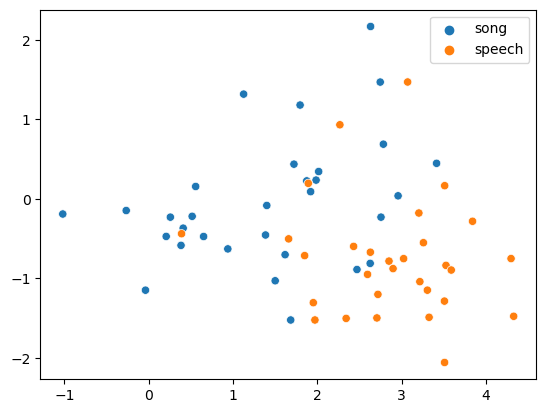

In [166]:
sns.scatterplot(x=X_res[:,0], y=X_res[:,1], hue=np.array(y_res)[:,0]);
plt.show()

Accuracy 0.8544303797468354
F1-score [0.9141791  0.52083333]
              precision    recall  f1-score   support

        song       0.90      0.93      0.91       264
      speech       0.57      0.48      0.52        52

    accuracy                           0.85       316
   macro avg       0.73      0.70      0.72       316
weighted avg       0.85      0.85      0.85       316



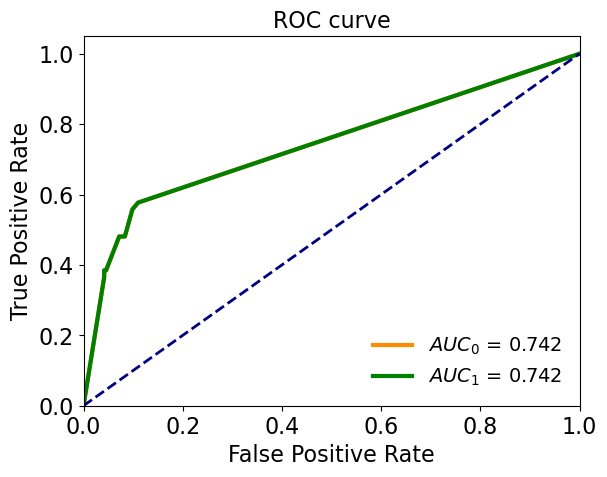

In [187]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)
X_test_res, y_test_res = CondensedNearestNeighbour().fit_resample(X_test, y_test)

# Applica la PCA all'X_test utilizzando gli stessi PCs dell'X_train
X_test_pca = pca.transform(X_test_res)

# Ora puoi utilizzare X_test_pca come input per il tuo modello addestrato
y_pred = clf.predict(X_test_pca)

# Calcola le metriche di valutazione del modello
print('Accuracy %s' % accuracy_score(y_test_res, y_pred))
print('F1-score %s' % f1_score(y_test_res, y_pred, average=None))
print(classification_report(y_test_res, y_pred))


label_encoder = LabelEncoder()
y_t = pd.DataFrame(label_encoder.fit_transform(y_test_res))

y_score = clf.predict_proba(X_test_pca)
fpr, tpr, _ = roc_curve(y_t, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [168]:
#OverSampling
#SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_pca, y_train2)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'vocal_channel': 1})


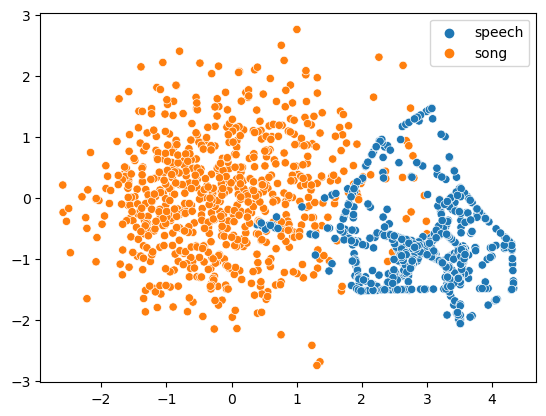

In [169]:
sns.scatterplot(x=X_res[:,0], y=X_res[:,1], hue=np.array(y_res)[:,0]);
plt.show()

Accuracy 0.8829113924050633
F1-score [0.93211009 0.57471264]
              precision    recall  f1-score   support

        song       0.90      0.96      0.93       264
      speech       0.71      0.48      0.57        52

    accuracy                           0.88       316
   macro avg       0.81      0.72      0.75       316
weighted avg       0.87      0.88      0.87       316



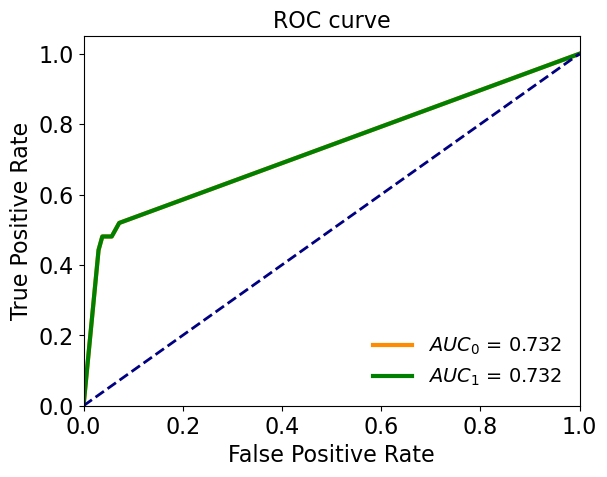

In [170]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

X_test_pca = pca.transform(X_test_res)

# Ora puoi utilizzare X_test_pca come input per il tuo modello addestrato
y_pred = clf.predict(X_test_pca)

# Calcola le metriche di valutazione del modello
print('Accuracy %s' % accuracy_score(y_test_res, y_pred))
print('F1-score %s' % f1_score(y_test_res, y_pred, average=None))
print(classification_report(y_test_res, y_pred))


label_encoder = LabelEncoder()
y_t = pd.DataFrame(label_encoder.fit_transform(y_test_res))

y_score = clf.predict_proba(X_test_pca)
fpr, tpr, _ = roc_curve(y_t, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [171]:
#Oversampling
#ADASYN

from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_pca, y_train2)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({'vocal_channel': 1})


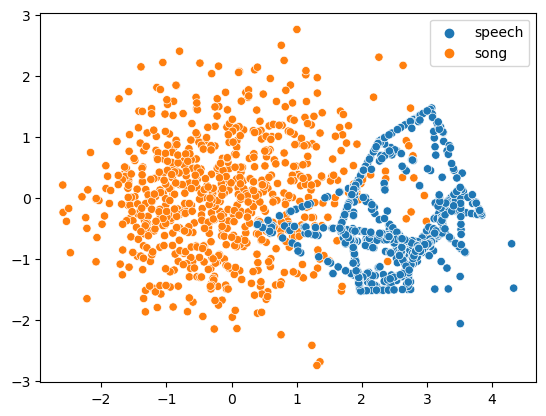

In [172]:
sns.scatterplot(x=X_res[:,0], y=X_res[:,1], hue=np.array(y_res)[:,0]);
plt.show()

Accuracy 0.8639240506329114
F1-score [0.91962617 0.55670103]
              precision    recall  f1-score   support

        song       0.91      0.93      0.92       264
      speech       0.60      0.52      0.56        52

    accuracy                           0.86       316
   macro avg       0.75      0.73      0.74       316
weighted avg       0.86      0.86      0.86       316



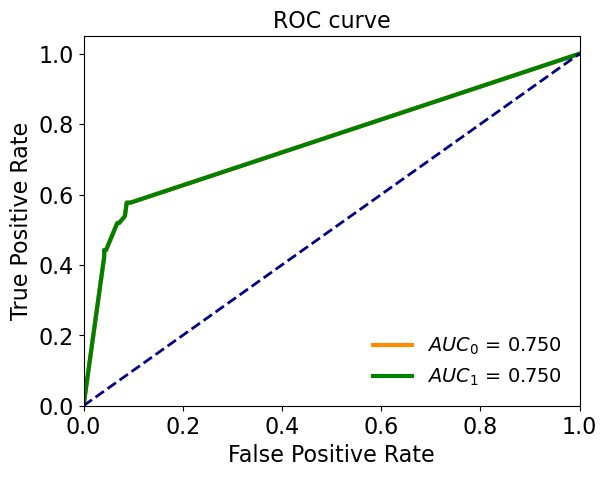

In [173]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test.iloc[:,0:2])

X_test_pca = pca.transform(X_test_res)

# Ora puoi utilizzare X_test_pca come input per il tuo modello addestrato
y_pred = clf.predict(X_test_pca)

# Calcola le metriche di valutazione del modello
print('Accuracy %s' % accuracy_score(y_test_res, y_pred))
print('F1-score %s' % f1_score(y_test_res, y_pred, average=None))
print(classification_report(y_test_res, y_pred))


label_encoder = LabelEncoder()
y_t = pd.DataFrame(label_encoder.fit_transform(y_test_res))

y_score = clf.predict_proba(X_test_pca)
fpr, tpr, _ = roc_curve(y_t, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()